In [8]:
#from __future__ import print_function, division
from builtins import range, input
import random
from sklearn.model_selection import train_test_split
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import datasets
import import_ipynb
from sklearn import metrics
weight_list=[]
from sklearn.linear_model import LogisticRegression

class AdaBoost:
  def __init__(self, M):
    self.M = M

  def fit(self, X, Y):
    self.models = []
    self.alphas = []

    N, _ = X.shape
    W = np.ones(N) / N

    for m in range(self.M):
      tree =DecisionTreeClassifier(max_depth=1)
      tree.fit(X,Y,sample_weight=W)
      P = tree.predict(X)

      err = W.dot(P != Y)
      alpha = 0.5*(np.log(1 - err) - np.log(err))

      W = W*np.exp(-alpha*Y*P) # vectorized form
      W = W / W.sum() # normalize so it sums to 1
      weight_list.append(W)

      self.models.append(tree)
      self.alphas.append(alpha)

  def predict(self, X):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    N, _ = X.shape
    FX = np.zeros(N)
    for alpha, tree in zip(self.alphas, self.models):
      FX += alpha*tree.predict(X)
    return np.sign(FX), FX

  def score(self, X, Y):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    P, FX = self.predict(X)
    L = np.exp(-Y*FX).mean()
    return np.mean(P == Y), L





if __name__ == '__main__':
    cancer=datasets.load_breast_cancer()
    X=cancer.data
    Y=cancer.target
    Y[Y == 0] = -1
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2,random_state=109) # 70% training and 30% test
   # make the targets -1,+1
    per=(Ytrain.shape[0])*(10/100) #20% data will be mislabeled

    k=random.sample(range(Ytrain.shape[0]), int(per)) #list of index no. of mislabeled data
    Ytrain=np.array(Ytrain)
    for i in k:
        if Ytrain[i-1]==1:
            Ytrain[i-1]=-1;
        else:
            Ytrain[i-1]=1
#mislabeled data created here till now
    itr=10
    prev=0
    while 1:
        model = AdaBoost(itr)
        model.fit(Xtrain, Ytrain)
        y_pred_ada,cf=model.predict(Xtest)
        current=int(metrics.accuracy_score(Ytest,y_pred_ada)*100)
        if current<prev:
            break
        prev=current
        itr=itr+1


In [9]:
weight_list=np.array(weight_list)
weight_list=np.transpose(weight_list)

In [17]:
a=len(weight_list)
nm=weight_list[:,itr-1]

In [21]:
Q=[]
x=[]
for i in range(a):
    x=[i,nm[i]]
    Q.append(x)
    x=[]
Q.sort(key = lambda Q: Q[1]) 


In [24]:
mis=[]
for i in k:
    mis.append(nm[i])

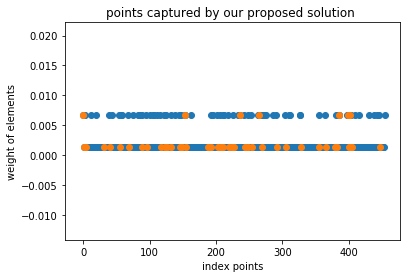

In [28]:
plt.scatter(range(a),nm)
plt.scatter(k,mis)
plt.xlabel("index points")
plt.ylabel("weight of elements")
plt.title("points captured by our proposed solution ")
plt.show()

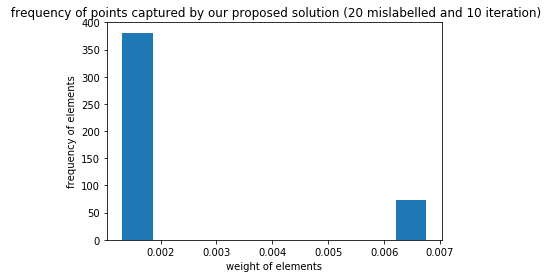

In [30]:
plt.xlabel("weight of elements")
plt.ylabel("frequency of elements")
plt.title(" frequency of points captured by our proposed solution (20 mislabelled and 10 iteration)")

plt.hist(nm)
plt.show()

In [33]:
#finding 4th quartile
a=len(nm)
a2=(a/100)*75
a3=(a/100)*88

#3rd quartile
m3=[]
index3=[]
inderdash=[]
for i in range(int(a2),a):
    m3.append(Q[i])
for j in m3:
    index3.append(j[0])

#4th quartile
m4=[]
index4=[]
inderdash=[]
for i in range(int(a3),a):
    m4.append(Q[i])
for j in m4:
    index4.append(j[0])

In [34]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    
    if (a_set & b_set): 
        wq=a_set & b_set 
    else: 
        print("No common elements")  
    return wq

In [35]:
wq1=common_member(k,index4)
wq2=common_member(k,index3)
print(len(wq1))
print(len(wq2))
print(len(k))
print("3rd quartile",len(index3))
print("4th quartile",len(index4))

6
8
45
3rd quartile 114
4th quartile 55
